In [4]:
!pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv

In [3]:
raw_data = pd.read_csv("data_clean.csv")

In [4]:
raw_data.tail(7)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,152,18.0,131.0,8.0,76,9,29,2010,76,PS
152,153,20.0,223.0,11.5,68,9,30,2010,68,S
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [5]:
raw_data.shape

(158, 10)

In [6]:
raw_data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [7]:
#information about the missing values or null values in our data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [8]:
#As my first column was unnamed so it was useless and in order to extract other columns expect the 0th column I have used iloc method. 
data1 = raw_data.iloc[:,1:]

In [9]:
data1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [10]:
# Creating the copy of the data1 so that any changes I will make to my data will not reflect the original data. 
data2 = data1.copy()

# Data type constraints

In [11]:
# This command will give me error because month column includes character type of data i.e 'may' and that cannot be converted to numeric. 
data2['Month'] = pd.to_numeric(data2['Month'])

ValueError: Unable to parse string "May" at position 23

In [12]:
# I have to display the values of month column 
data2['Month'].values

array(['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', 'May', '5', '5',
       '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '5', '9', '9',
       '9', '9'], dtype=object)

# Treating Data type constraints

In [13]:
# By inserting errors = coerce, this will put nan in place of character values. 
data2['Month'] = pd.to_numeric(data2['Month'],errors = 'coerce')
data2['Temp C']= pd.to_numeric(data2['Temp C'],errors = 'coerce')
data2['Weather']= data2['Weather'].astype('category')            #this astype function is used to convert the data in specific data type as my weather column consist of categories of data so I will convert this to category type of data.

In [14]:
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


In [16]:
data2.Month.values

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., nan,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  5.,  9.,  9.,
        9.,  9.])

In [17]:
# determining the duplicated rows
data2[data2.duplicated()].shape

(1, 9)

In [18]:
data2[data2.duplicated()]      # display the duplicated row

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [19]:
data_clean1 = data2.drop_duplicates()    #drop the duplicated row

In [20]:
data_clean1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [21]:
data_clean2 = data_clean1.drop('Temp C',axis = 1)      # want to drop the duplicate column so axis = 1

In [22]:
data_clean2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [23]:
data_clean3 = data_clean2.rename({'Solar.R' : 'Solar'}, axis=1)

In [24]:
data_clean3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

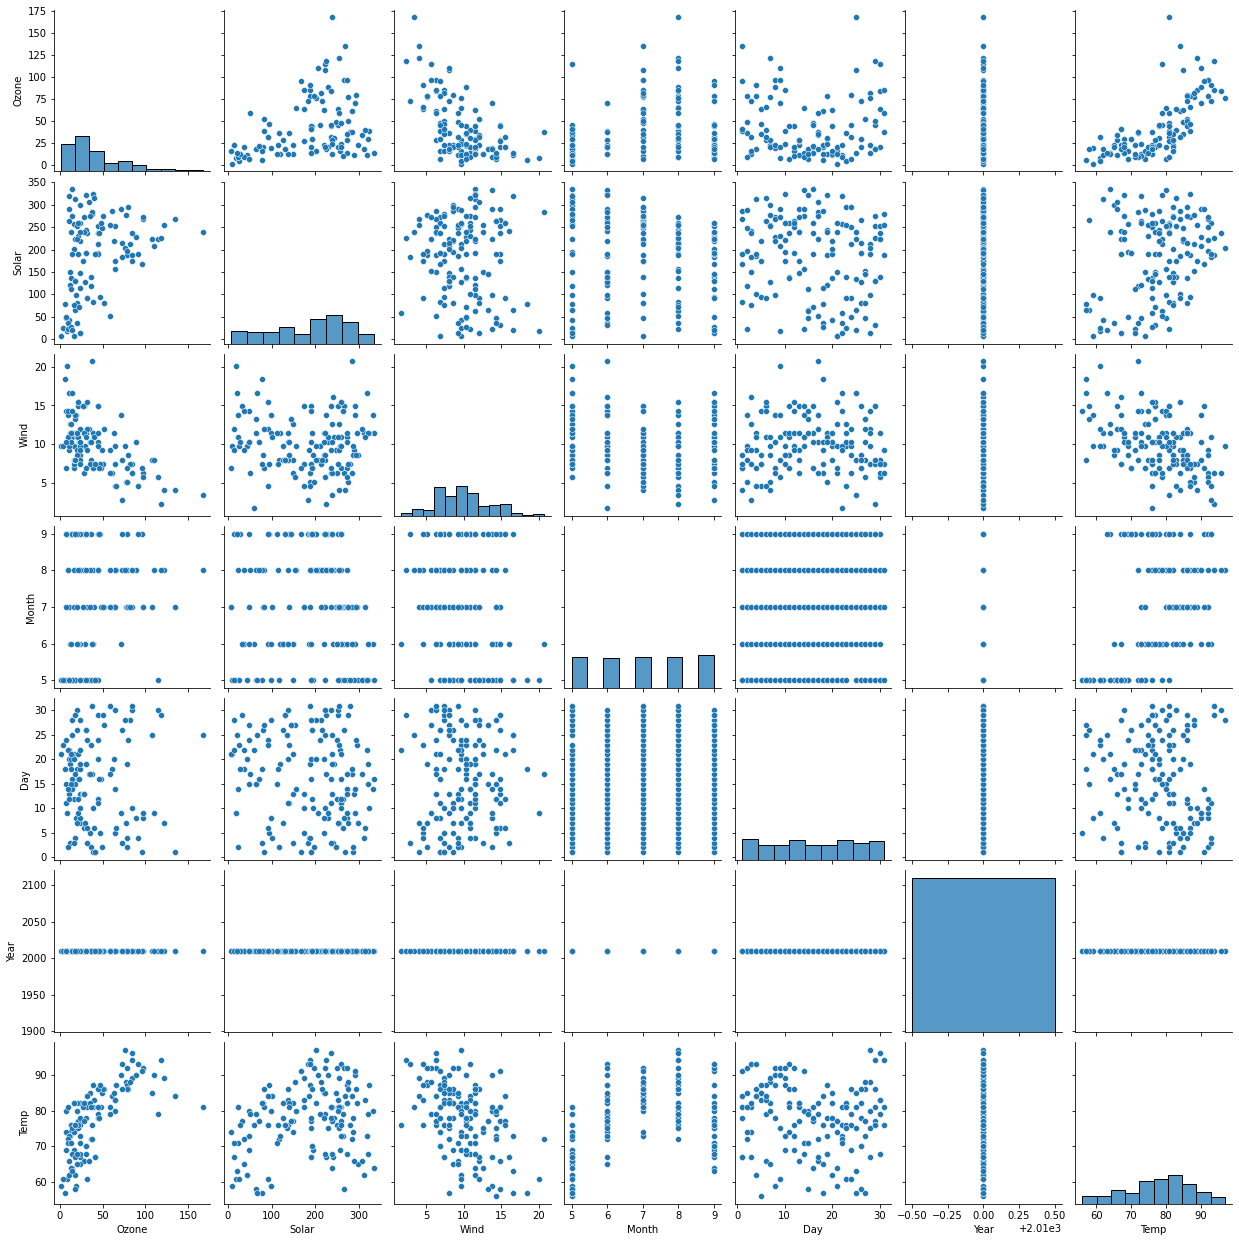

In [26]:
sns.pairplot(data_clean3)

In [27]:
data_clean3.Ozone.describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

<AxesSubplot:>

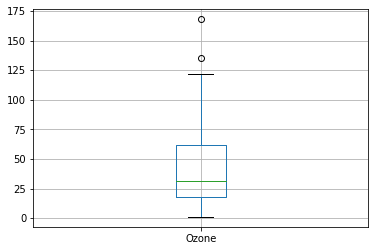

In [28]:
data_clean3.boxplot(column = 'Ozone')

<AxesSubplot:>

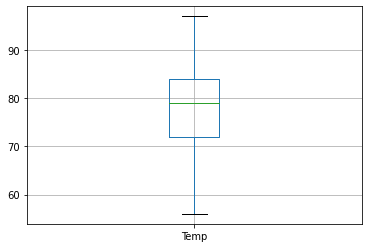

In [45]:
data_clean3.boxplot(column = 'Temp')

(array([ 4.,  9., 21., 39., 30., 22., 22.,  7.,  1.,  2.]),
 array([ 1.7,  3.6,  5.5,  7.4,  9.3, 11.2, 13.1, 15. , 16.9, 18.8, 20.7]),
 <BarContainer object of 10 artists>)

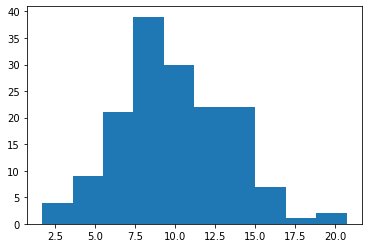

In [50]:
plt.hist(data_clean3['Wind'])

<AxesSubplot:>

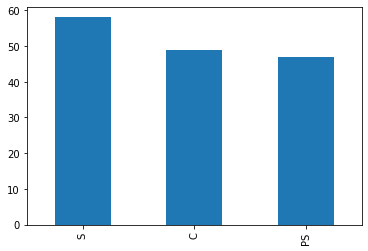

In [29]:
data_clean3.Weather.value_counts().plot.bar()

# Missing values imputation

<AxesSubplot:>

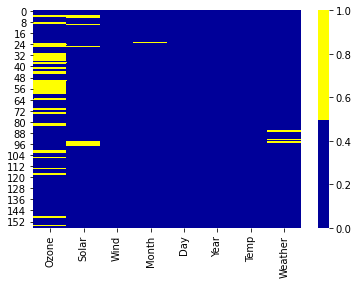

In [30]:
cols = data_clean3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_clean3[cols].isnull(),cmap=sns.color_palette(colours))

In [31]:
data_clean3.isnull().sum()             # This .sum will give the total no. of missing values columns wise

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [32]:
# mean imputation for the ozone column

mean = data_clean3['Ozone'].mean()

In [33]:
data_clean3['Ozone'] = data_clean3['Ozone'].fillna(mean)

In [34]:
data_clean3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


In [35]:
obj_columns = data_clean3[['Weather']]

In [36]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [37]:
obj_columns = obj_columns.fillna(obj_columns.mode())

In [38]:
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [39]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [40]:
data_clean3.shape

(157, 8)

In [41]:
obj_columns.shape

(157, 1)

In [42]:
data_clean4=pd.concat([data_clean3,obj_columns],axis=1)

In [43]:
data_clean4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    3
dtype: int64

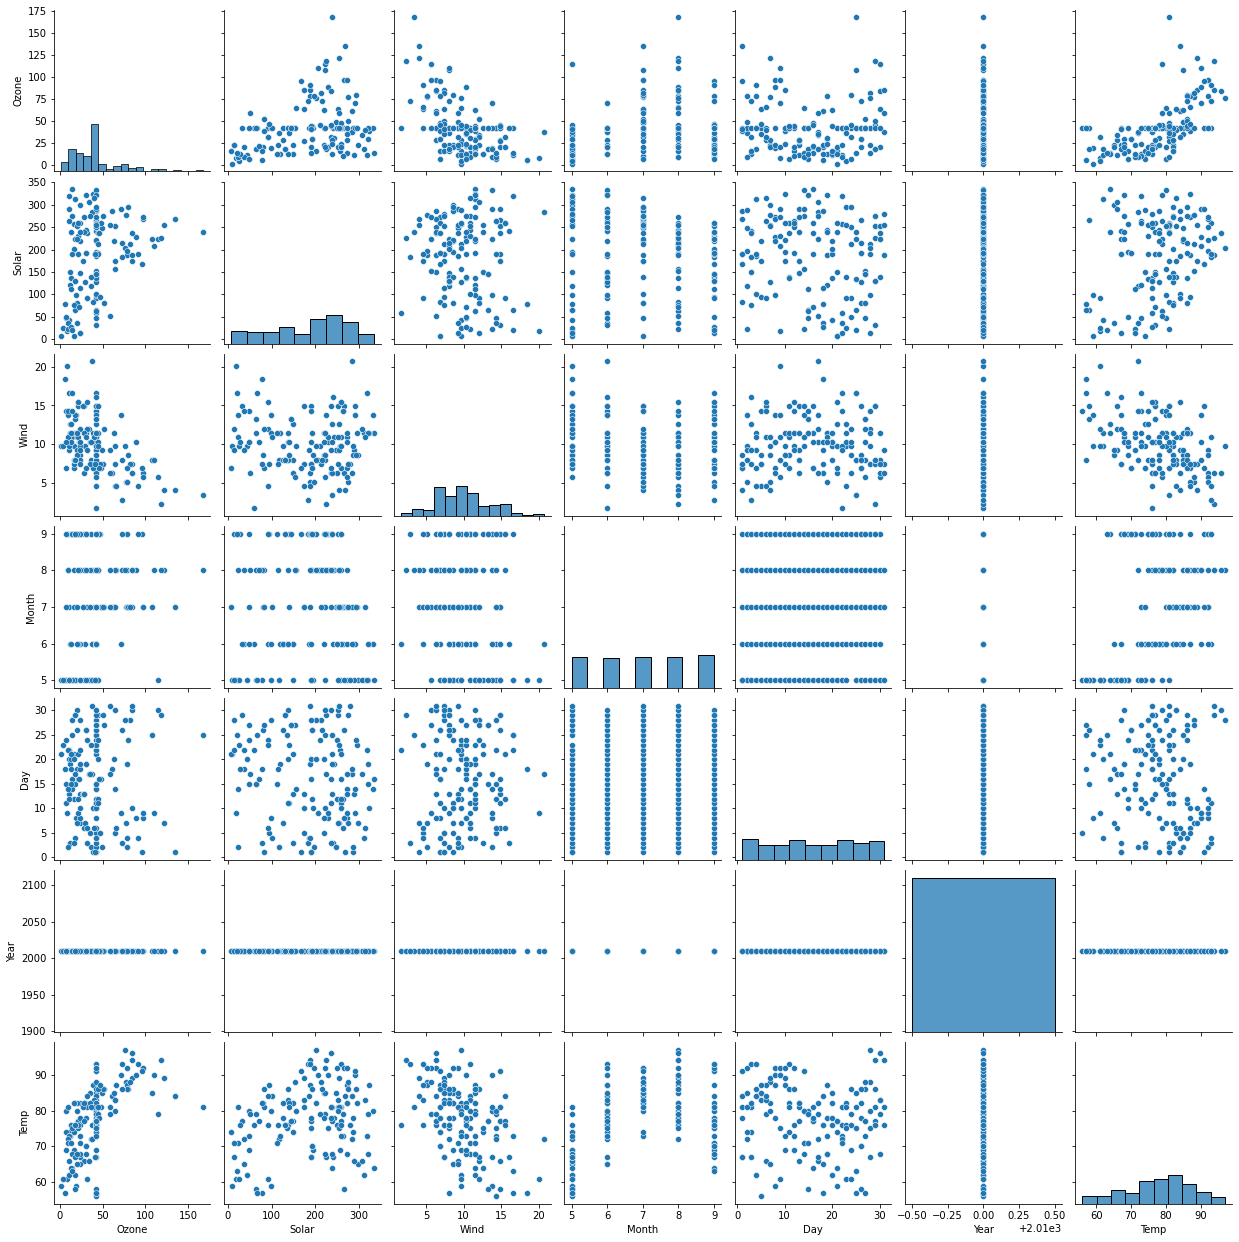

In [44]:
#scatter plot and correlation matrix

sns.pairplot(data_clean3)

In [48]:
data_clean3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


In [51]:
# Creating dummy variables, mentioning column name specifically is optional. pd.get_dummies will automatically convert the categorical columns to dummy variables 

data_clean4 = pd.get_dummies(data_clean3, columns = ['Weather'])

In [52]:
data_clean4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,2010,62,0,0,1
4,41.815126,NaN,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.0,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.0,13.2,9.0,27,2010,77,0,0,1


In [53]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [55]:
# for performing normalization or standardization first the data should be converted to array type of data
# Normalization technique

data_clean4.values

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 30.        , 193.        ,   6.9       , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.81512605, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [60]:
array = data_clean4.values

Scaler = MinMaxScaler(feature_range = (0,1))           #feature_range is optional, it will return the values in the range 0-1 by default
rescaledx = Scaler.fit_transform(array[:,0:5])          #In order to get fitted values and not get range of values that is confidence inteval I have used this scaler.fit_transform function

In [62]:
#summarize the transform data
set_printoptions(precision = 2)
print(rescaledx[0:5,:])

[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24  nan 0.66 0.   0.13]]


In [68]:
from sklearn.preprocessing import StandardScaler

In [73]:
#standardization technique

array = data_clean4.values
scaler = StandardScaler().fit(array)
rescaledx = scaler.transform(array)

set_printoptions(precision = 2)
print(rescaledx[0:5,:])

[[-0.03  0.05 -0.72 -1.43 -1.67  0.   -1.15 -0.67 -0.65  1.31]
 [-0.21 -0.76 -0.55 -1.43 -1.56  0.   -0.61  1.48 -0.65 -0.77]
 [-1.05 -0.41  0.76 -1.43 -1.45  0.   -0.4  -0.67  1.53 -0.77]
 [-0.84  1.44  0.45 -1.43 -1.33  0.   -1.68 -0.67 -0.65  1.31]
 [ 0.     nan  1.25 -1.43 -1.22  0.   -2.32 -0.67 -0.65  1.31]]


# Automated EDA 

In [76]:
sweet_report = sv.analyze(data2)
sweet_report.show_html('Weather_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
